In [38]:
import pandas as pd
import numpy as np
from collections import Counter
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn import preprocessing

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from IPython.display import HTML
from scipy.special import inv_boxcox
from scipy import stats
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn import svm

from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [39]:
nCoV_20200121_20200206_dataset = pd.read_csv("2. 2019_nCoV_20200121_20200206.csv")

In [40]:
attr_obj = nCoV_20200121_20200206_dataset.shape
print(f"Numri i atributeve në dataset është: {attr_obj[1]}")
print(f"Numri i objekteve në dataset është: {attr_obj[0]}")

Numri i atributeve në dataset është: 6
Numri i objekteve në dataset është: 1877


In [41]:
nCoV_20200121_20200206_dataset.dtypes

Province/State     object
Country/Region     object
Last Update        object
Confirmed         float64
Recovered         float64
Death             float64
dtype: object

In [42]:
def num_missing(x):
  return sum(x.isnull())

In [43]:
print("Numri i vlerave që mungojnë në çdo kolonë:")
print(nCoV_20200121_20200206_dataset.apply(num_missing, axis=0)) #axis=0 nenkupton qe funksionoi num_missing do te aplikohet ne cdo kolone

Numri i vlerave që mungojnë në çdo kolonë:
Province/State    459
Country/Region      0
Last Update         0
Confirmed          30
Recovered         876
Death             999
dtype: int64


In [44]:
def nullToModeValue(kolona):
    duration_column = nCoV_20200121_20200206_dataset[kolona]
    duration_counter = Counter(duration_column)

    print(f'\nNumri i vlerave null në kolonën {kolona} : {nCoV_20200121_20200206_dataset[kolona].isnull().sum()}')
    
    print("Vlera më së shumti e përsëritur:", duration_counter.most_common(1)[0][0])
    nCoV_20200121_20200206_dataset[kolona].fillna(duration_counter.most_common(1)[0][0], inplace=True)
    print(f'\nNumri i vlerave null pas plotësimit të vlerave NaN në kolonën {kolona} : {nCoV_20200121_20200206_dataset[kolona].isnull().sum()}')

In [45]:
nullToModeValue('Confirmed')


Numri i vlerave null në kolonën Confirmed : 30
Vlera më së shumti e përsëritur: 1.0

Numri i vlerave null pas plotësimit të vlerave NaN në kolonën Confirmed : 0


In [46]:
nullToModeValue('Recovered')


Numri i vlerave null në kolonën Recovered : 876
Vlera më së shumti e përsëritur: 0.0

Numri i vlerave null pas plotësimit të vlerave NaN në kolonën Recovered : 0


In [47]:
nullToModeValue('Death')


Numri i vlerave null në kolonën Death : 999
Vlera më së shumti e përsëritur: 0.0

Numri i vlerave null pas plotësimit të vlerave NaN në kolonën Death : 0


In [48]:
print("Numri i vlerave që mungojnë në çdo kolonë:")
print(nCoV_20200121_20200206_dataset.apply(num_missing, axis=0))

Numri i vlerave që mungojnë në çdo kolonë:
Province/State    459
Country/Region      0
Last Update         0
Confirmed           0
Recovered           0
Death               0
dtype: int64


In [49]:
dups = nCoV_20200121_20200206_dataset.duplicated()
print('Numri i rreshtave të përsëritur = %d' % (dups.sum()))

Numri i rreshtave të përsëritur = 433


In [50]:
x_confirmed = nCoV_20200121_20200206_dataset['Confirmed']
y_death = nCoV_20200121_20200206_dataset['Death']
z_death = nCoV_20200121_20200206_dataset['Recovered']

Text(0, 0.5, 'Death')

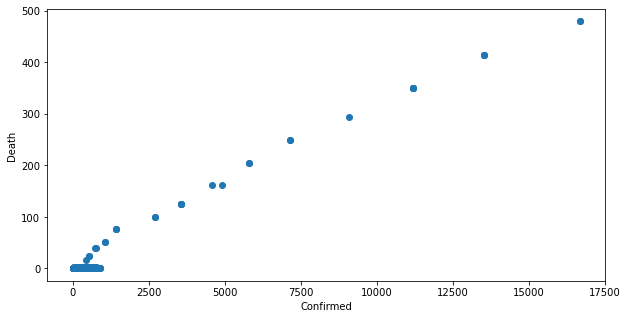

In [55]:
plt.scatter(x_confirmed,y_death)
plt.rcParams["figure.figsize"] = (10,7)
plt.xlabel('Confirmed')
plt.ylabel('Death')

Text(0, 0.5, 'Recovered')

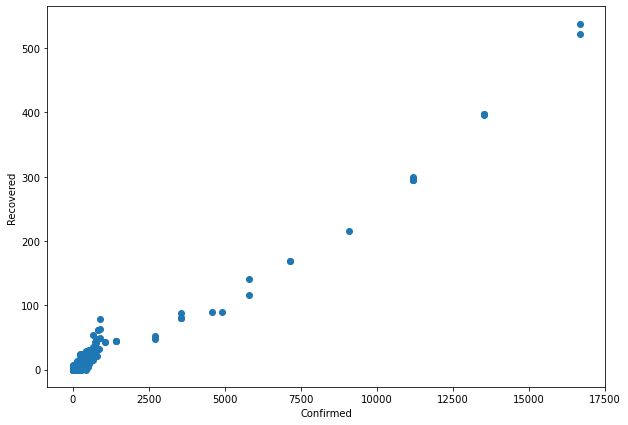

In [56]:
plt.scatter(x_confirmed,z_death)
plt.rcParams["figure.figsize"] = (20,10)
plt.xlabel('Confirmed')
plt.ylabel('Recovered')

In [57]:
#split dataset in features and target variable
columns_fields = ['Recovered']
X = nCoV_20200121_20200206_dataset[columns_fields] # Features
y = nCoV_20200121_20200206_dataset.Death # Target variable

In [58]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [59]:
clf = svm.SVC(kernel='linear', C=1, random_state=42)

In [60]:
scores = cross_val_score(clf, X, y, cv=5)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


In [61]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.88 accuracy with a standard deviation of 0.01


In [63]:
# Create Decision Tree classifer object
clf_decission_tree = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf_decission_tree = clf_decission_tree.fit(X_train,y_train)

#Predict the response for test dataset
y_pred_decission_tree_clf = clf_decission_tree.predict(X_test)

In [66]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_decission_tree_clf))
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test, y_pred_decission_tree_clf))
print("Correct Score:",metrics.recall_score(y_test, y_pred_decission_tree_clf, average='micro'))
print("Kappa Score:",metrics.cohen_kappa_score(y_test, y_pred_decission_tree_clf))

Accuracy: 0.8900709219858156
Mean Absolute Error: 0.601063829787234
Correct Score: 0.8900709219858156
Kappa Score: 0.4000205895473733


In [67]:
clf_decission_tree_confusion_matrix = metrics.confusion_matrix(y_test, y_pred_decission_tree_clf)
clf_decission_tree_confusion_matrix

array([[481,   8,   1,   0,   0,   0,   0,   0,   0,   0],
       [ 37,  17,   0,   0,   0,   0,   0,   0,   0,   0],
       [  8,   4,   0,   1,   0,   0,   0,   0,   0,   0],
       [  1,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   2,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   1,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   1,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1]], dtype=int64)

In [68]:
#Create a Random Forest Classifier
clf_random_forest = RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf_random_forest.fit(X_train,y_train)

y_pred_random_forest_clf = clf_random_forest.predict(X_test)

In [69]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_random_forest_clf))
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test, y_pred_random_forest_clf))
print("Correct Score:",metrics.recall_score(y_test, y_pred_random_forest_clf, average='micro'))
print("Kappa Score:",metrics.cohen_kappa_score(y_test, y_pred_random_forest_clf))

Accuracy: 0.8865248226950354
Mean Absolute Error: 0.6046099290780141
Correct Score: 0.8865248226950354
Kappa Score: 0.3986605804151535


In [70]:
clf_random_forest_confusion_matrix = metrics.confusion_matrix(y_test, y_pred_random_forest_clf)
clf_random_forest_confusion_matrix

array([[478,  11,   1,   0,   0,   0,   0,   0,   0,   0],
       [ 36,  18,   0,   0,   0,   0,   0,   0,   0,   0],
       [  8,   4,   0,   1,   0,   0,   0,   0,   0,   0],
       [  1,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   2,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   1,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   1,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1]], dtype=int64)

In [71]:
# Create a Gaussian Classifier
clf_gaussian = GaussianNB()
clf_gaussian.fit(X_train, y_train)
y_pred_gaussian_clf = clf_gaussian.predict(X_test)

In [72]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_gaussian_clf))
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test, y_pred_gaussian_clf))
print("Correct Score:",metrics.recall_score(y_test, y_pred_gaussian_clf, average='micro'))
print("Kappa Score:",metrics.cohen_kappa_score(y_test, y_pred_gaussian_clf))

Accuracy: 0.8581560283687943
Mean Absolute Error: 2.24468085106383
Correct Score: 0.8581560283687943
Kappa Score: 0.11289371239825419


In [73]:
clf_gaussian_confusion_matrix = metrics.confusion_matrix(y_test, y_pred_gaussian_clf)
clf_gaussian_confusion_matrix

array([[482,   0,   8,   0,   0,   0,   0,   0,   0,   0],
       [ 52,   0,   2,   0,   0,   0,   0,   0,   0,   0],
       [ 11,   0,   1,   1,   0,   0,   0,   0,   0,   0],
       [  0,   0,   1,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   2,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   1,   0,   0,   0,   0,   0],
       [  0,   0,   1,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   1,   0],
       [  0,   0,   1,   0,   0,   0,   0,   0,   0,   0]], dtype=int64)

In [74]:
#split dataset in features and target variable
columns_list = ['Death', 'Recovered', 'Confirmed']
X = nCoV_20200121_20200206_dataset[columns_list] # Features
# y = country_wise_latest_dataset.Deaths # Target variable
y = nCoV_20200121_20200206_dataset['Confirmed']

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [75]:
boxcox_target = stats.boxcox(nCoV_20200121_20200206_dataset.Confirmed)
box_cox_param = boxcox_target[1]
background_color='#fbfbfb'

In [76]:
# Function for providing generalized results for regression model
def evaluate_model(model,x_train,y_train,x_test,y_test):
    '''
    Inputs
    1. regression model eg: LinearRegression(),LassoRegression() etc.
    2. training x data
    3. training y data
    4. testing x data
    5. testing y data
    '''
    model.fit(x_train,y_train)
    model_name=model.__class__.__name__
    
    train_score=model.score(x_train,y_train)
    test_score=model.score(x_test,y_test)
    print (f"Training score: {train_score}\nTesting score: {test_score}")
    
    y_pred=model.predict(x_test)
    print("Prediction completed.")
    df=pd.DataFrame({"Actual": y_test,
                     "Predicted":y_pred})
    
    #Apply inverse box cox to retrieve original target results
    df=inv_boxcox(df,box_cox_param)
    
    #Finding the difference between original and predicted
    df["difference"]=df.Predicted-df.Actual
    df.reset_index(inplace=True)
    
    #Plot actual vs predicted
    plt.figure(figsize=(10,5));
    sns.scatterplot(data=df,x="index",y="Actual",color='grey',label=["Actual"]).set_facecolor(background_color);
    sns.lineplot(data=df,x="index",y="Predicted",color='salmon',label=["Predicted"]);
    plt.legend(loc="right",bbox_to_anchor=(1.1,1));
    plt.title(model_name+" -Actual vs Predicted");
    plt.show()
    
    print ("Sample comparison file for actual and predicted target feature:")
    display(df.head())
    
    # Return the model for re-use if required.
    return model

In [77]:
#General data frame and function for storing and comparing model results.
df_model_results=pd.DataFrame(columns=["ModelName","TrainScore"])

def store_model_results(modl_name,train_score):
    global df_model_results
    row_loc=df_model_results.shape[0]+1
    df_model_results.loc[row_loc,["ModelName","TrainScore"]]=[modl_name,train_score]

In [78]:
def show_model_scores(x,y):
    global df_model_results
    df_model_results=df_model_results.iloc[0:0] #reset display dataframe
    for model in  [LinearRegression(),
                   Lasso(),
                   Ridge(),
                   ElasticNet()]:
        store_model_results(model.__class__.__name__, cross_val_score(model,x,y,cv=3).mean())
    df_model_results.sort_values("TrainScore",ascending=False,inplace=True)
    display(df_model_results)
    display(HTML('Selected model : <b>' + df_model_results.head(1)['ModelName'].values[0] + '</b>'))

In [79]:
# X_train, X_test, y_train, y_test
show_model_scores(X_train,y_train)

,ModelName,TrainScore
1,LinearRegression,1.0
3,Ridge,1.0
2,Lasso,1.0
4,ElasticNet,1.0


Training score: 1.0
Testing score: 1.0
Prediction completed.


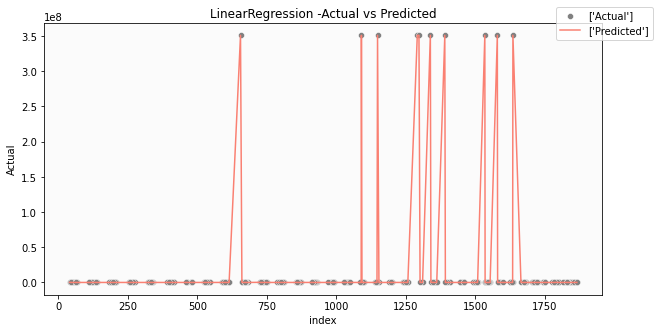

Sample comparison file for actual and predicted target feature:


,index,Actual,Predicted,difference
0,1233,NaN,NaN,NaN
1,608,2.923019,2.923019,9.592327e-14
2,589,151912.522844,151912.522844,2.130400e-08
3,650,NaN,NaN,NaN
4,1564,NaN,NaN,NaN


LinearRegression()

In [80]:
evaluate_model(LinearRegression(),X_train,y_train,X_test,y_test)

Training score: 0.9999999999999999
Testing score: 0.9999999999999999
Prediction completed.


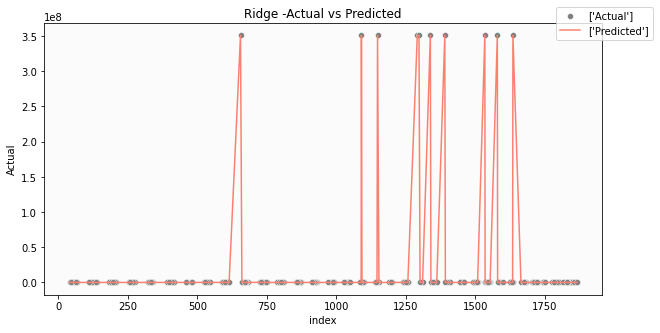

Sample comparison file for actual and predicted target feature:


,index,Actual,Predicted,difference
0,1233,NaN,NaN,NaN
1,608,2.923019,2.923028,0.000009
2,589,151912.522844,151914.041309,1.518465
3,650,NaN,NaN,NaN
4,1564,NaN,NaN,NaN


Ridge()

In [81]:
evaluate_model(Ridge(),X_train,y_train,X_test,y_test)

Training score: 0.9999999999989749
Testing score: 0.9999999999989749
Prediction completed.


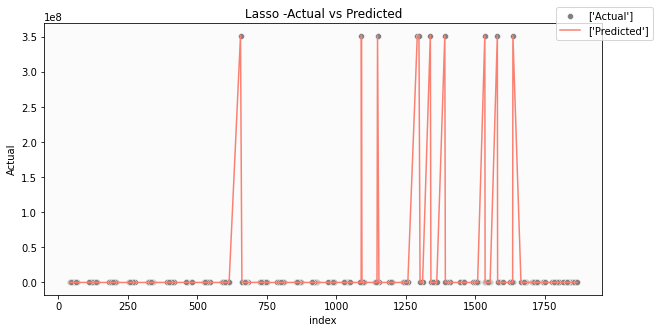

Sample comparison file for actual and predicted target feature:


,index,Actual,Predicted,difference
0,1233,NaN,NaN,NaN
1,608,2.923019,2.923567,0.000547
2,589,151912.522844,152028.429073,115.906229
3,650,NaN,NaN,NaN
4,1564,NaN,NaN,NaN


Lasso()

In [82]:
evaluate_model(Lasso(),X_train,y_train,X_test,y_test)

Training score: 0.9999999999989749
Testing score: 0.9999999999989749
Prediction completed.


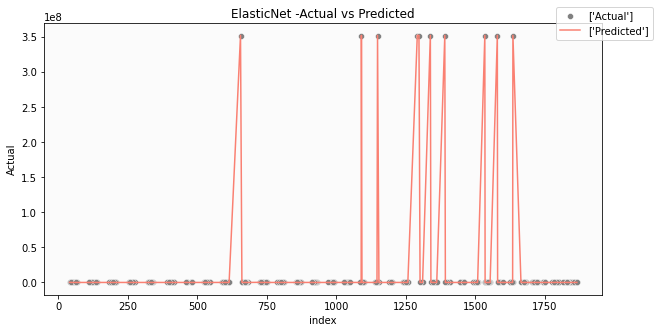

Sample comparison file for actual and predicted target feature:


,index,Actual,Predicted,difference
0,1233,NaN,NaN,NaN
1,608,2.923019,2.923567,0.000547
2,589,151912.522844,152028.429015,115.906171
3,650,NaN,NaN,NaN
4,1564,NaN,NaN,NaN


ElasticNet()

In [83]:
evaluate_model(ElasticNet(),X_train,y_train,X_test,y_test)